In [1]:
%matplotlib inline

import numpy as np
import power_laws
import matplotlib.colors
import seaborn
import pandas as pd
import rubisco_data

from scipy import stats
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the data from Excel, remove data points that are not comparable.
# raw_kin_df is everything in the file, kin_df is the subset with all relevant kinetic data.
fname = '../data/062118_rubisco_kinetics_merged.csv'
raw_kin_df, kin_df = rubisco_data.load_rubisco_data(fname)

# Want to split data in various ways
# Savir vs. Non-Savir (mostly new) data
savir_pmid = '20142476'
savir_df = raw_kin_df[raw_kin_df.pmid_or_doi == savir_pmid]
nonsavir_df = raw_kin_df[raw_kin_df.pmid_or_doi != savir_pmid]

# Group by RuBisCO form
grouped_form = raw_kin_df.groupby('isoform')

# Markers we use for plotting below.
markers = 'o><^dsphH*'

cnames = ["windows blue", "amber", "greyish brown", "dusty purple", "dusty teal", "dusty red", ]
named_colors = seaborn.xkcd_palette(cnames)

In [3]:
cols = ['species', 'KC', 'vC', 'S'] 
numeric_df = raw_kin_df[cols]

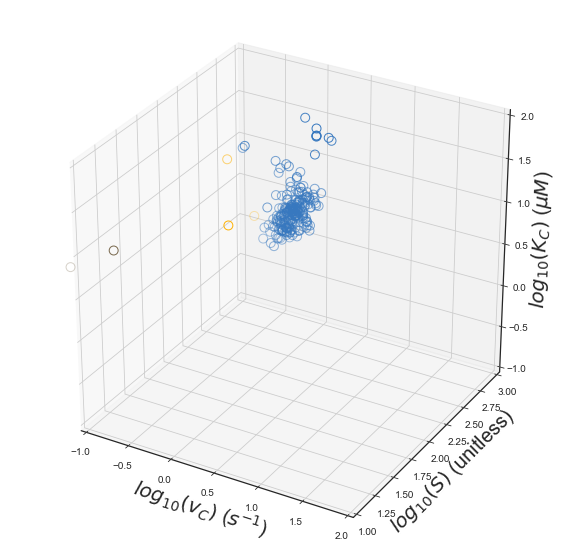

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
    
groups = {'1': 'I', 
          '2': 'II',
          '2_3': 'II/III', 
          '3': 'III'}


for i, (group, gdf) in enumerate(grouped_form):
    if group == '3':
        continue
        
    label = 'Form %s' % groups[group]
    c = matplotlib.colors.rgb2hex(named_colors[i])
    
    log_vC = np.log10(gdf.vC)
    log_S = np.log10(gdf.S)
    log_KC = np.log10(gdf.KC)
    
    ax.scatter(log_vC, log_S, log_KC, s=80, label=label,
               facecolors='none', edgecolors=c)

ax.set_xlabel('$log_{10}(v_C)$ ($s^{-1}$)', fontsize=20)
ax.set_ylabel('$log_{10}(S)$ (unitless)', fontsize=20)
ax.set_zlabel('$log_{10}(K_C)$ ($\mu M$)', fontsize=20)

ax.set_ylim(1, 3)
ax.set_xlim(-1, 2)
ax.set_zlim(-1, 2)
plt.show()

In [18]:
plt.show()